In [1]:
#@title Librerias
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.regularizers import l2
from sklearn.utils import shuffle
import seaborn as sns

In [2]:
#@title Conectar con drive
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/IA 2/Proyecto')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/IA 2/Proyecto


In [3]:
#@title Cargar el dataset
# Cargar dataset de entrenamiento
X_train = np.load('dataset/X_train.npy')
y_train = np.load('dataset/y_train.npy')

#Cargar dataset de validación
X_val = np.load('dataset/X_val.npy')
y_val = np.load('dataset/y_val.npy')

#Cargar dataset de test
X_test = np.load('dataset/X_test.npy')
y_test = np.load('dataset/y_test.npy')

In [4]:
X_train.shape, X_val.shape, X_test.shape

((276, 224, 224, 3), (61, 224, 224, 3), (61, 224, 224, 3))

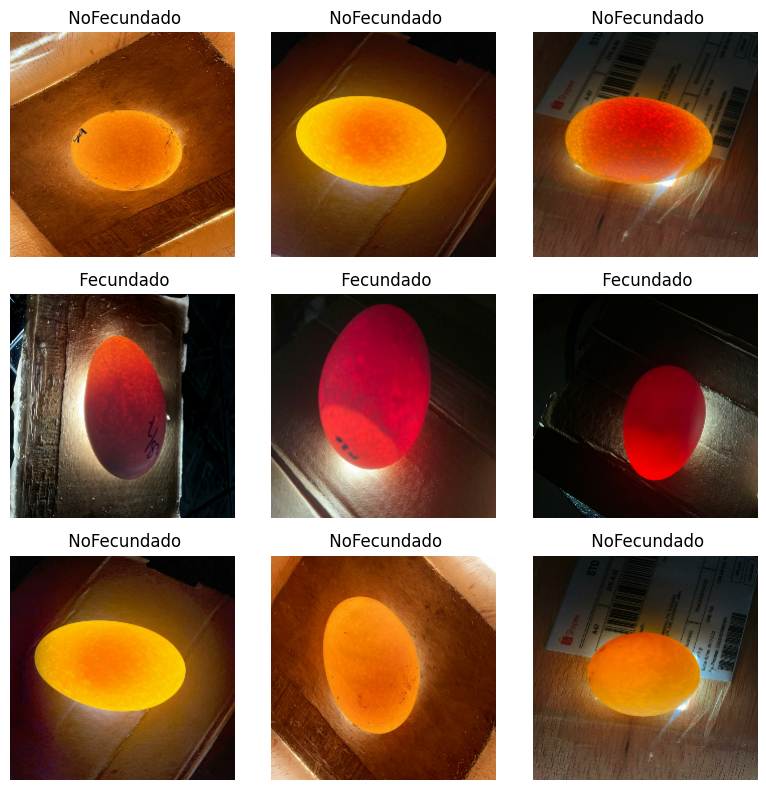

In [5]:
#@title Visualizar los datos
# Número de ejemplos a mostrar
num_examples = 9  # Por ejemplo, una cuadrícula de 3x3

# Seleccionar aleatoriamente algunas imágenes y etiquetas
indices = np.random.choice(len(X_train), num_examples, replace=False)
images = X_train[indices]
labels = y_train[indices]

# Etiquetas para las clases
class_names = {0: "Fecundado", 1: "NoFecundado"}

# Visualizar las imágenes
plt.figure(figsize=(8, 8))
for i in range(num_examples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))  # Asegúrate de que las imágenes estén en formato correcto
    plt.title(f" {class_names[labels[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


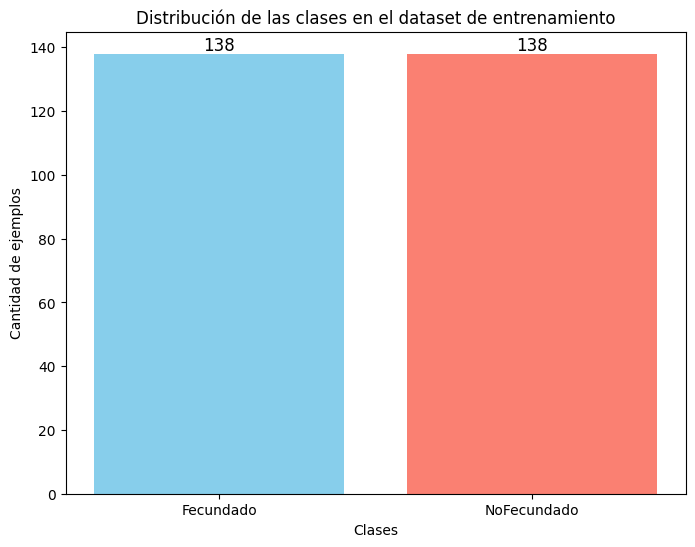

Fecundado: 138 ejemplos
NoFecundado: 138 ejemplos


In [6]:
#@title Distribución de las clases
# Contar la frecuencia de las clases
unique_classes, counts = np.unique(y_train, return_counts=True)

# Etiquetas y colores
class_labels = ["Fecundado", "NoFecundado"]
colors = ['skyblue', 'salmon']  # Verde para Fecundado, Rojo para NoFecundado

# Crear el gráfico
plt.figure(figsize=(8, 6))
bars = plt.bar(class_labels, counts, color=colors)

# Agregar valores encima de las barras
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(count), ha='center', fontsize=12)

# Configurar el gráfico
plt.xlabel("Clases")
plt.ylabel("Cantidad de ejemplos")
plt.title("Distribución de las clases en el dataset de entrenamiento")
plt.show()

# Mostrar los totales en consola
for cls, count in zip(class_labels, counts):
    print(f"{cls}: {count} ejemplos")


In [34]:
#@title Normalizar los datasets
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [6]:
#@title Modelo DNN
modelo_dnn= tf.keras.models.Sequential([
    tf.keras.layers.Flatten( input_shape=[224, 224, 3]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
modelo_dnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])
modelo_dnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │       1,204,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,206,009 (4.60 MB)

 Trainable params: 1,206,009 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#Entrenar el modelo
history1 = modelo_dnn.fit(X_train, y_train, epochs=9, batch_size=16, validation_data=(X_val,y_val))

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.5262 - loss: 0.6651 - val_accuracy: 0.5082 - val_loss: 0.5411
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8081 - loss: 0.4462 - val_accuracy: 0.9344 - val_loss: 0.4276
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9094 - loss: 0.3914 - val_accuracy: 0.9672 - val_loss: 0.3503
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9146 - loss: 0.3488 - val_accuracy: 0.7869 - val_loss: 0.4832
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8770 - loss: 0.3698 - val_accuracy: 0.9508 - val_loss: 0.2779
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9527 - loss: 0.2577 - val_accuracy: 0.8525 - val_loss: 0.3673
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9151 - loss: 0.2377 - val_accuracy: 0.9344 - val_loss: 0.2307
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9220 - loss: 0.2065 - val_accuracy: 0.9344 - val_loss: 0.

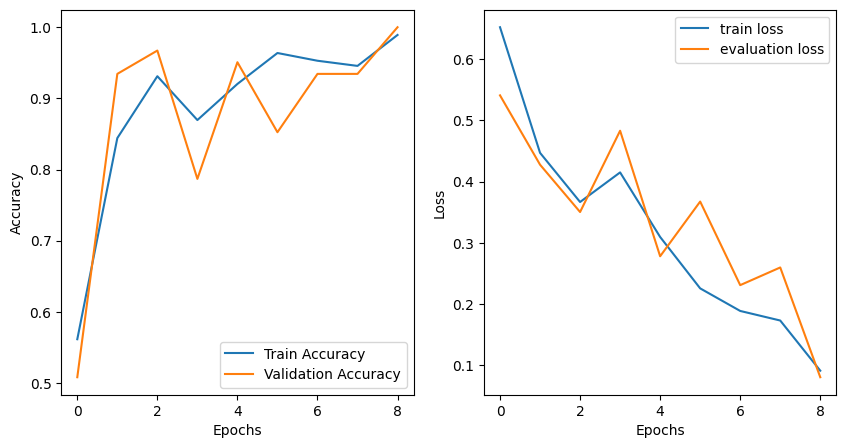

In [8]:
#Graficar la precisión y la pérdida durante el entrenamiento

fig = plt.figure(figsize=(10,5))

# Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history1.history['accuracy'], label='Train Accuracy');
ax.plot(history1.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

# Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history1.history['loss'], label='train loss');
ax.plot(history1.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step - accuracy: 0.9891 - loss: 0.0782
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


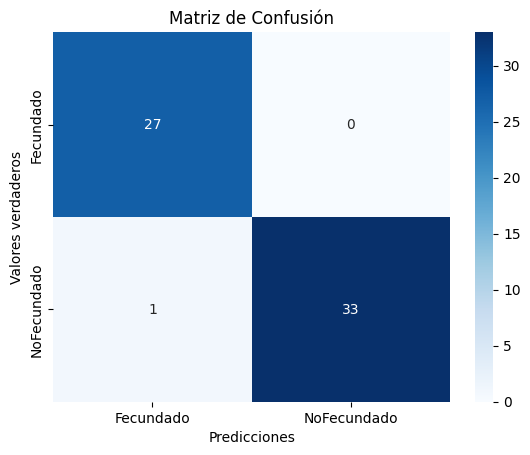

In [9]:
#Evaluar el modelo

modelo_dnn.evaluate(X_test, y_test)

# Realizar predicciones
y_pred1 = modelo_dnn.predict(X_test)

# Convertir las predicciones en clases (0 o 1)
y_pred1 = (y_pred1 > 0.5).astype(int)

#Matriz de confusion
cm1 = confusion_matrix(y_test, y_pred1)

sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=['Fecundado', 'NoFecundado'], yticklabels=['Fecundado', 'NoFecundado'])
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [10]:
#@title CNN basica

modelo_CNN = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=[224, 224, 3]),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilar el modelo
modelo_CNN.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

modelo_CNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 216, 216, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 214, 214, 8)         │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 107, 107, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 91592)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │      11,723,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,825,657 (45.11 MB)

 Trainable params: 11,825,657 (45.11 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history2 = modelo_CNN.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16
)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4467 - loss: 0.7760 - val_accuracy: 0.7705 - val_loss: 0.6889
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 138ms/step - accuracy: 0.7720 - loss: 0.6390 - val_accuracy: 0.6230 - val_loss: 0.5577
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.7144 - loss: 0.4808 - val_accuracy: 0.8361 - val_loss: 0.5315
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.9366 - loss: 0.3904 - val_accuracy: 0.8852 - val_loss: 0.5326
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9355 - loss: 0.2725 - val_accuracy: 0.8525 - val_loss: 1.7369
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9201 - loss: 0.3422 - val_accuracy: 0.9180 - val_loss: 0.5295
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9648 - loss: 0.2295 - val_accuracy: 0.8852 - val_loss: 1.0313
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.9858 - loss: 0.1731 - val_accuracy: 0.8

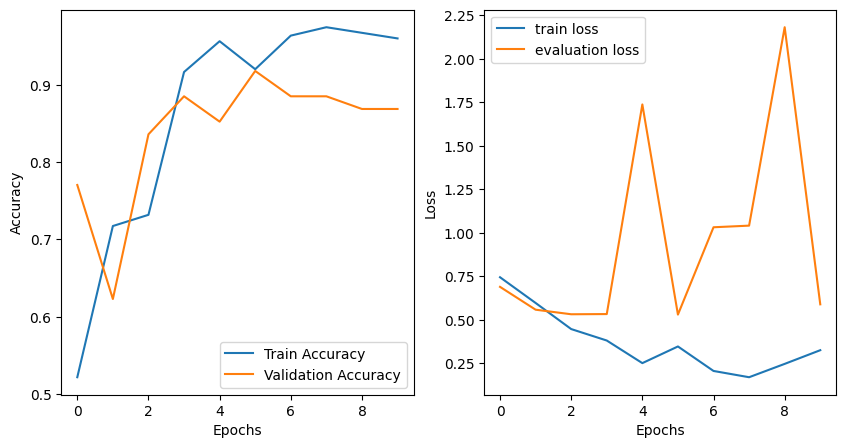

In [12]:
#Graficar la precisión y la pérdida durante el entrenamiento

fig = plt.figure(figsize=(10,5))

# Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history2.history['accuracy'], label='Train Accuracy');
ax.plot(history2.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

# Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history2.history['loss'], label='train loss');
ax.plot(history2.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step - accuracy: 0.9245 - loss: 0.3863
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step


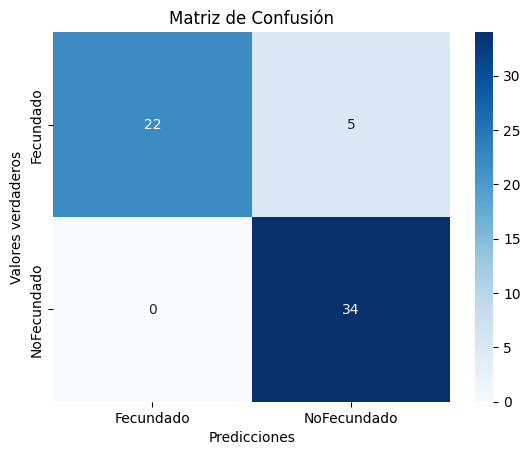

In [13]:
#Evaluar el modelo

modelo_CNN.evaluate(X_test, y_test)

# Realizar predicciones
y_pred2 = modelo_CNN.predict(X_test)

# Convertir las predicciones en clases (0 o 1)
y_pred2 = (y_pred2 > 0.5).astype(int)

#Matriz de confusion
cm2 = confusion_matrix(y_test, y_pred2)

sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=['Fecundado', 'NoFecundado'], yticklabels=['Fecundado', 'NoFecundado'])
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [14]:
#@title CNN 2

modelo_CNN2 = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=[224, 224, 3]),
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilar el modelo
modelo_CNN2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

modelo_CNN2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 220, 220, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 218, 218, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 216, 216, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 214, 214, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 107, 107, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1465472)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │     187,580,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,679,057 (715.94 MB)

 Trainable params: 187,679,057 (715.94 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history3 = modelo_CNN2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16
)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.6440 - loss: 4.3932 - val_accuracy: 0.7705 - val_loss: 1.3788
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.9444 - loss: 0.1864 - val_accuracy: 0.9672 - val_loss: 0.1658
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.9712 - loss: 0.0635 - val_accuracy: 0.9672 - val_loss: 0.1332
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.9958 - loss: 0.0282 - val_accuracy: 0.9508 - val_loss: 0.0922
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9896 - loss: 0.0242 - val_accuracy: 0.9508 - val_loss: 0.1178
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.9925 - loss: 0.0177 - val_accuracy: 1.0000 - val_loss: 0.0162
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.9508 - val_loss: 0.1074
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.9907 - loss: 0.0325 - val_accuracy: 0.9

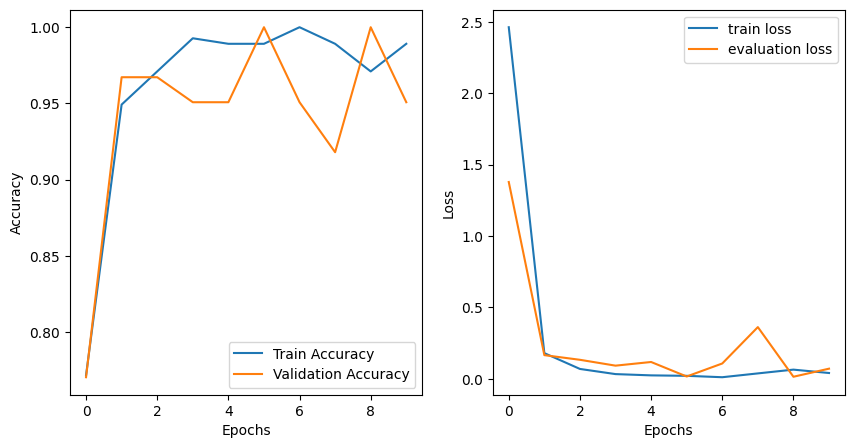

In [16]:
#Graficar la precisión y la pérdida durante el entrenamiento

fig = plt.figure(figsize=(10,5))

# Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history3.history['accuracy'], label='Train Accuracy');
ax.plot(history3.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

# Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history3.history['loss'], label='train loss');
ax.plot(history3.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step - accuracy: 0.9891 - loss: 0.0243


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step


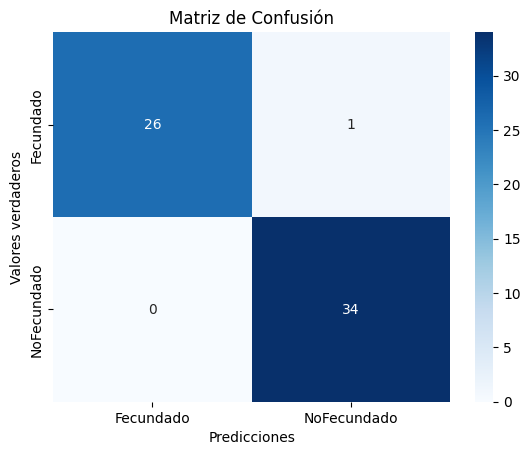

In [17]:
#Evaluar el modelo

modelo_CNN2.evaluate(X_test, y_test)

# Realizar predicciones
y_pred3 = modelo_CNN2.predict(X_test)

# Convertir las predicciones en clases (0 o 1)
y_pred3 = (y_pred3 > 0.5).astype(int)

#Matriz de confusion
cm3 = confusion_matrix(y_test, y_pred3)

sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", xticklabels=['Fecundado', 'NoFecundado'], yticklabels=['Fecundado', 'NoFecundado'])
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [4]:
#@title Convertir las imagenes a grises
from PIL import Image
import numpy as np

# Función para convertir un dataset a escala de grises usando PIL
def convert_to_grayscale_with_pil(X):
    gray_images = []
    for img_array in X:
        # Convierte el array NumPy en una imagen PIL
        img = Image.fromarray((img_array).astype(np.uint8))
        # Convertir a escala de grises
        gray_img = img.convert('L')
        # Convertir de nuevo a NumPy y añadir el canal extra
        gray_images.append(np.array(gray_img)[..., np.newaxis])
    return np.array(gray_images)

# Convertir los datasets
X_train_gray = convert_to_grayscale_with_pil(X_train)
X_val_gray = convert_to_grayscale_with_pil(X_val)
X_test_gray = convert_to_grayscale_with_pil(X_test)


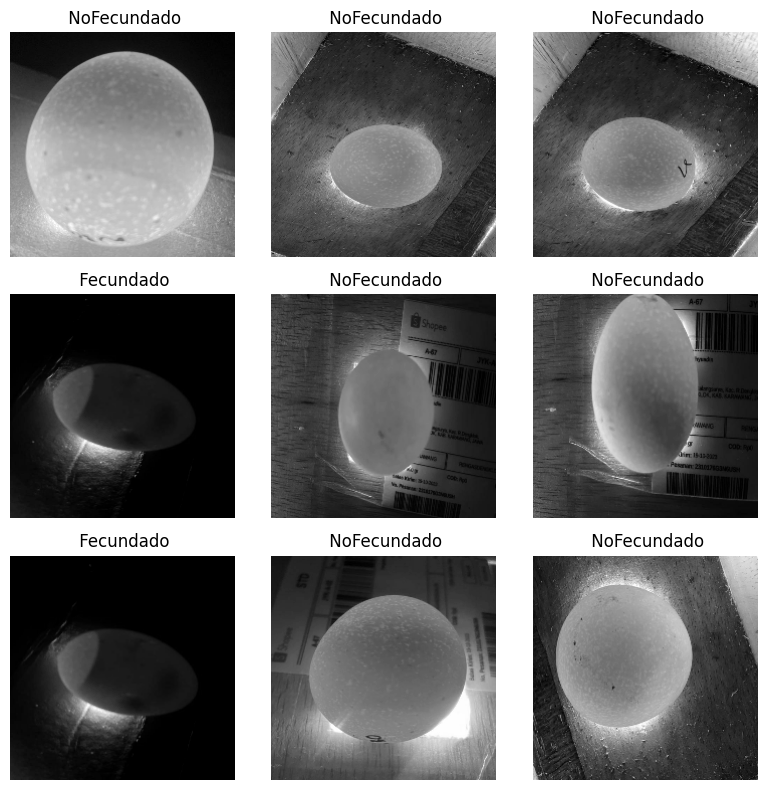

In [20]:
#@title Visualizar los datos en gris
# Número de ejemplos a mostrar
num_examples = 9  # Por ejemplo, una cuadrícula de 3x3

# Seleccionar aleatoriamente algunas imágenes y etiquetas
indices = np.random.choice(len(X_train), num_examples, replace=False)
images = X_train_gray[indices]
labels = y_train[indices]

# Etiquetas para las clases
class_names = {0: "Fecundado", 1: "NoFecundado"}

# Visualizar las imágenes
plt.figure(figsize=(8, 8))
for i in range(num_examples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].squeeze().astype("uint8"), cmap='grey')  # Asegúrate de que las imágenes estén en formato correcto
    plt.title(f" {class_names[labels[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [5]:
#@title Normalizar los datasets en gris
X_train_gray = X_train_gray / 255.0
X_test_gray = X_test_gray / 255.0
X_val_gray = X_val_gray / 255.0

X_train_gray.shape, X_val_gray.shape, X_test_gray.shape

((276, 224, 224, 1), (61, 224, 224, 1), (61, 224, 224, 1))

In [6]:
#@title CNN con imagenes en grises

modelo_CNN3 = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=[224, 224, 1]),
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilar el modelo
modelo_CNN3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

modelo_CNN3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 218, 218, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 216, 216, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 214, 214, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 107, 107, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1465472)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     187,580,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,678,913 (715.94 MB)

 Trainable params: 187,678,913 (715.94 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history4 = modelo_CNN3.fit(
    X_train_gray, y_train,
    validation_data=(X_val_gray, y_val),
    epochs=10,
    batch_size=16
)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6308 - loss: 1.2900 - val_accuracy: 0.7705 - val_loss: 0.3854
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 160ms/step - accuracy: 0.9164 - loss: 0.2192 - val_accuracy: 0.8525 - val_loss: 0.4020
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9596 - loss: 0.1490 - val_accuracy: 0.9180 - val_loss: 0.2890
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.9860 - loss: 0.0284 - val_accuracy: 0.9344 - val_loss: 0.1555
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9932 - loss: 0.0251 - val_accuracy: 0.9344 - val_loss: 0.1225
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.9016 - val_loss: 0.4093
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9977 - loss: 0.0109 - val_accuracy: 0.8689 - val_loss: 0.6607
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.9651 - loss: 0.1013 - val_accuracy: 0.9

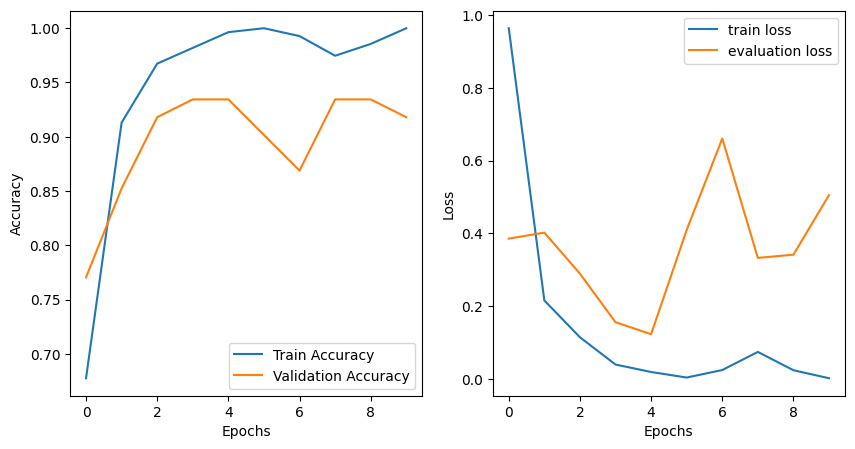

In [8]:
#Graficar la precisión y la pérdida durante el entrenamiento

fig = plt.figure(figsize=(10,5))

# Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history4.history['accuracy'], label='Train Accuracy');
ax.plot(history4.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

# Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history4.history['loss'], label='train loss');
ax.plot(history4.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step - accuracy: 0.9464 - loss: 0.4030
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step


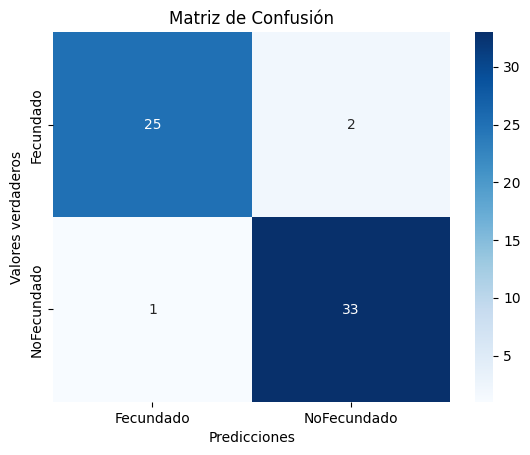

In [9]:
#Evaluar el modelo

modelo_CNN3.evaluate(X_test_gray, y_test)

# Realizar predicciones
y_pred4 = modelo_CNN3.predict(X_test_gray)

# Convertir las predicciones en clases (0 o 1)
y_pred4 = (y_pred4 > 0.5).astype(int)

#Matriz de confusion
cm4 = confusion_matrix(y_test, y_pred4)

sns.heatmap(cm4, annot=True, fmt="d", cmap="Blues", xticklabels=['Fecundado', 'NoFecundado'], yticklabels=['Fecundado', 'NoFecundado'])
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D, Reshape

# Tamaño de las imágenes
input_shape = (224, 224, 3)

# Tamaño de los embebidos (configurable)
embedding_size = 128  # Puedes ajustar este valor

# Definir el encoder
input_img = Input(shape=input_shape, name="Input_Image")

# Bloques convolucionales
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Embedding (capa bottleneck)
x = Flatten()(x)
encoded = Dense(embedding_size, activation='relu', name="Embedding")(x)

# Modelo del encoder
encoder = Model(input_img, encoded, name="Encoder")

# Definir el decoder
x = Dense(7 * 7 * 128, activation='relu')(encoded)
x = Reshape((7, 7, 128))(x)

x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same', name="Reconstructed_Image")(x)

# Autoencoder completo
autoencoder = Model(input_img, decoded, name="Autoencoder")

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='mse')  # La pérdida MSE es común para autoencoders

# Mostrar resumen del modelo
autoencoder.summary()


In [ ]:
# Ajustar el autoencoder
history = autoencoder.fit(
    X_train, X_train,  # Entrenamiento con imágenes originales (reconstrucción)
    validation_data=(X_val, X_val),
    epochs=10,
    batch_size=16,
)


In [ ]:
# Extraer embebidos para el conjunto de validación
embeddings = encoder.predict(X_test)

print("Dimensiones de los embebidos:", embeddings.shape)

In [ ]:
import matplotlib.pyplot as plt

# Reconstrucciones para un subconjunto
reconstructions = autoencoder.predict(X_test[:10])

# Mostrar originales y reconstruidas
n = 10  # Número de ejemplos
plt.figure(figsize=(20, 5))
for i in range(n):
    # Imagen original
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].astype('uint8'))
    plt.title("Original")
    plt.axis("off")

    # Imagen reconstruida
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructions[i].astype('uint8'))
    plt.title("Reconstruida")
    plt.axis("off")
plt.show()
